# 1. Install and Import Dependencies

In [1]:
# GitHub repo installation of paddle
!python -m pip install paddlepaddle-gpu==2.0.0 -i https://mirror.baidu.com/pypi/simple

Looking in indexes: https://mirror.baidu.com/pypi/simple

You should consider upgrading via the 'D:\YouTube\10-08-2021 - Paddle OCR\paddle\Scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
# Install paddle OCR
!pip install paddleocr

You should consider upgrading via the 'd:\youtube\10-08-2021 - paddle ocr\paddle\scripts\python.exe -m pip install --upgrade pip' command.


In [3]:
# Clone paddle OCR repo - get FONTS for visualization
!git clone https://github.com/PaddlePaddle/PaddleOCR

fatal: destination path 'PaddleOCR' already exists and is not an empty directory.


In [4]:
from paddleocr import PaddleOCR, draw_ocr # main OCR dependencies
from matplotlib import pyplot as plt # plot images
import cv2 #opencv
import os # folder directory navigation

# 2. Instantiate Model and Detect

In [13]:
# Setup model
ocr_model = PaddleOCR(lang='en')

Namespace(benchmark=False, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='C:\\Users\\User/.paddleocr/2.2.0.1\\ocr\\cls\\ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, det=True, det_algorithm='DB', det_db_box_thresh=0.5, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.6, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='C:\\Users\\User/.paddleocr/2.2.0.1\\ocr\\det\\en\\en_ppocr_mobile_v2.0_det_infer', det_sast_nms_thresh=0.2, det_sast_polygon=False, det_sast_score_thresh=0.5, drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model_dir=None, e2e_pgnet_mode='fast', e2e_pgnet_polygon=True, e2e_pgnet_score_thresh=0.5, e2e_pgnet_valid_set='totaltext', enable_mkldnn=False, gpu_mem=500, help='==SUPPRESS==', image_dir=None, ir_optim=True, label_list=['0', '180'], lang

In [63]:
img_path = os.path.join('.', 'drug1.jpg')

In [64]:
# Run the ocr method on the ocr model
result = ocr_model.ocr(img_path)

[2021/08/22 12:15:41] root WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
[2021/08/22 12:15:41] root DEBUG: dt_boxes num : 7, elapse : 0.030998706817626953
[2021/08/22 12:15:41] root DEBUG: rec_res num  : 7, elapse : 0.01799941062927246


In [65]:
result

[[[[219.0, 153.0], [308.0, 161.0], [306.0, 183.0], [217.0, 174.0]],
  ('KxPharmacy', 0.89364547)],
 [[[220.0, 198.0], [288.0, 201.0], [288.0, 215.0], [219.0, 213.0]],
  ('50MCG TABLETS', 0.9147478)],
 [[[218.0, 217.0], [335.0, 215.0], [336.0, 232.0], [219.0, 234.0]],
  ('TAKE ONE TABLETBL', 0.9444441)],
 [[[219.0, 232.0], [284.0, 235.0], [283.0, 250.0], [218.0, 246.0]],
  ('EVErY DAY', 0.88497865)],
 [[[219.0, 256.0], [253.0, 259.0], [252.0, 274.0], [218.0, 272.0]],
  ('QTY:90', 0.95289475)],
 [[[217.0, 274.0], [331.0, 272.0], [332.0, 289.0], [218.0, 292.0]],
  ('MAYREFILL4XBY12-0120', 0.87269706)],
 [[[221.0, 289.0], [293.0, 292.0], [293.0, 306.0], [220.0, 304.0]],
  ('12-012019', 0.9300101)]]

In [66]:
for res in result:
    print(res[1][0]) 

KxPharmacy
50MCG TABLETS
TAKE ONE TABLETBL
EVErY DAY
QTY:90
MAYREFILL4XBY12-0120
12-012019


# 3. Visualise Results

In [67]:
# Extracting detected components
boxes = [res[0] for res in result] # 
texts = [res[1][0] for res in result]
scores = [res[1][1] for res in result]

In [68]:
# Specifying font path for draw_ocr method
font_path = os.path.join('PaddleOCR', 'doc', 'fonts', 'latin.ttf')

In [69]:
# Import our image - drug 1/2/3
# imports image
img = cv2.imread(img_path) 

# reorders the color channels
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

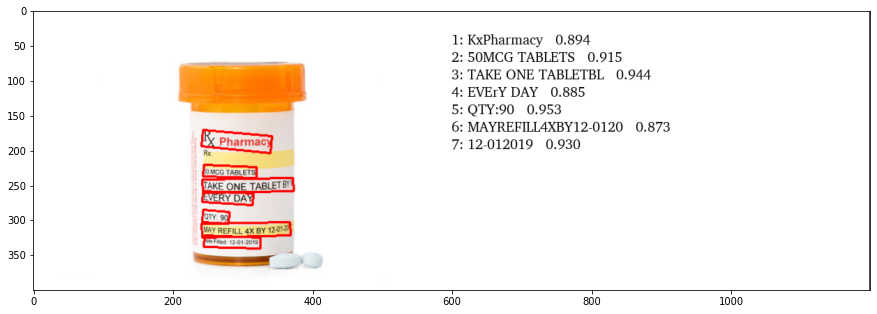

In [70]:
# Visualize our image and detections
# resizing display area
plt.figure(figsize=(15,15))

# draw annotations on image
annotated = draw_ocr(img, boxes, texts, scores, font_path=font_path) 

# show the image using matplotlib
plt.imshow(annotated) 

In [53]:
img.shape

(400, 800, 3)